# Rapprochement des fichiers 

In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
df_erp = pd.read_csv(r"C:\Users\tangu\OneDrive\Bureau\Python\Projet 5_Bottleneck\Bottelneck\erp.csv", sep = ';')
df_erp = df_erp.drop_duplicates(subset = ['product_id'])
df_erp.dropna(subset =["product_id"], how = 'any')
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      825 non-null    int64 
 1   onsale_web      825 non-null    int64 
 2   price           825 non-null    object
 3   stock_quantity  825 non-null    int64 
 4   stock_status    825 non-null    object
dtypes: int64(3), object(2)
memory usage: 38.7+ KB


In [3]:
df_liaison = pd.read_csv(r"C:\Users\tangu\OneDrive\Bureau\Python\Projet 5_Bottleneck\Bottelneck\liaison.csv", sep = ';')
df_liaison = df_liaison.rename(columns = {"id_web":"sku"})
df_liaison = df_liaison.drop_duplicates(subset = ['product_id'])
df_liaison = df_liaison.drop_duplicates(subset = ['sku'])
df_liaison.dropna(subset =["product_id"], how = 'any')
df_liaison.dropna(subset =["sku"], how = 'any')
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  735 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 17.2+ KB


In [4]:
df_web =pd.read_csv(r"C:\Users\tangu\OneDrive\Bureau\Python\Projet 5_Bottleneck\Bottelneck\web.csv", sep = ';')
df_web = df_web.drop_duplicates(subset = ['sku'])
df_web.dropna(subset =["sku"], how = 'any')
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 798
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    714 non-null    object 
 1   virtual                715 non-null    int64  
 2   downloadable           715 non-null    int64  
 3   rating_count           715 non-null    int64  
 4   average_rating         714 non-null    float64
 5   total_sales            714 non-null    float64
 6   tax_status             714 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            714 non-null    float64
 9   post_date              714 non-null    object 
 10  post_date_gmt          714 non-null    object 
 11  post_content           0 non-null      float64
 12  post_title             714 non-null    object 
 13  post_excerpt           714 non-null    object 
 14  post_status            714 non-null    object 
 15  commen

In [5]:
set(list(df_liaison['sku'])) - set(list(df_web['sku']))

{'12601',
 '13577',
 '13771',
 '14360',
 '14377',
 '14379',
 '14648',
 '14680-1',
 '14689',
 '14715',
 '14730',
 '14785',
 '15065',
 '15154',
 '15272',
 '15529',
 '15586',
 '15608',
 '15609',
 '15630'}

In [6]:
df_intermediary = pd.merge(df_erp, df_liaison,on = "product_id" , how = "right" )
df_intermediary.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 734
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      735 non-null    int64 
 1   onsale_web      735 non-null    int64 
 2   price           735 non-null    object
 3   stock_quantity  735 non-null    int64 
 4   stock_status    735 non-null    object
 5   sku             734 non-null    object
dtypes: int64(3), object(3)
memory usage: 40.2+ KB


In [7]:
df_final = pd.merge(df_intermediary, df_web, on = ["sku"], how = 'inner')
df_final = df_final.dropna(subset= ["product_id","sku"], how = 'any')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 714
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             714 non-null    int64  
 1   onsale_web             714 non-null    int64  
 2   price                  714 non-null    object 
 3   stock_quantity         714 non-null    int64  
 4   stock_status           714 non-null    object 
 5   sku                    714 non-null    object 
 6   virtual                714 non-null    int64  
 7   downloadable           714 non-null    int64  
 8   rating_count           714 non-null    int64  
 9   average_rating         714 non-null    float64
 10  total_sales            714 non-null    float64
 11  tax_status             714 non-null    object 
 12  tax_class              0 non-null      float64
 13  post_author            714 non-null    float64
 14  post_date              714 non-null    object 
 15  post_d

In [8]:
df_final.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,"24,2",0,outofstock,15298,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,"34,3",0,outofstock,15296,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,"20,8",0,outofstock,15300,0,0,0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,"14,1",0,outofstock,19814,0,0,0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46,0,outofstock,19815,0,0,0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [9]:
df_final = df_final.iloc[:,[0,1,2,3,4,5,10,23]]
df_final.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_name
0,3847,1,"24,2",0,outofstock,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018
1,3849,1,"34,3",0,outofstock,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017
2,3850,1,"20,8",0,outofstock,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
3,4032,1,"14,1",0,outofstock,19814,3.0,pierre-jean-villa-igp-gamine-2018
4,4039,1,46,0,outofstock,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017


# Le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne

In [10]:
df_final['price'] = [x.replace(',', '.') for x in df_final['price']]
df_final['price'] = df_final['price'].astype(float)
df_final['price'].dtypes

dtype('float64')

In [11]:
df_final['total_sales'] = df_final['total_sales'].astype(float)
df_final['price'].dtypes

dtype('float64')

In [12]:
df_final["CA_par_produit"] = df_final['price']*df_final["total_sales"]
df_final.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_name,CA_par_produit
0,3847,1,24.2,0,outofstock,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,0.0
3,4032,1,14.1,0,outofstock,19814,3.0,pierre-jean-villa-igp-gamine-2018,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017,0.0


### Le CA total:

In [13]:
CA_total = (df_final["CA_par_produit"]).sum()
print(CA_total)

70568.6


### Le CA par produit:

In [14]:
df_final.sort_values("CA_par_produit", ascending = False)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_name,CA_par_produit
195,4334,1,49.0,0,outofstock,7818,96.0,champagne-gosset-grand-blanc-de-blanc,4704.0
72,4144,1,49.0,11,instock,1662,87.0,champagne-gosset-grand-rose,4263.0
219,4402,1,176.0,8,instock,3510,13.0,cognac-frapin-vip-xo,2288.0
71,4142,1,53.0,8,instock,11641,30.0,champagne-gosset-grand-millesime-2006,1590.0
70,4141,1,39.0,1,instock,304,40.0,gosset-champagne-grande-reserve,1560.0
...,...,...,...,...,...,...,...,...,...
353,4791,1,13.6,24,instock,14599,0.0,maurice-schoech-pinot-noir-piece-de-chene-2016,0.0
352,4790,1,11.1,43,instock,15732,0.0,maurice-schoech-riesling-2018,0.0
349,4786,1,12.1,37,instock,15881,0.0,maurice-schoech-gewurztraminer-2018,0.0
347,4784,1,28.5,10,instock,15734,0.0,maurice-schoech-riesling-vendanges-tardives-2017,0.0


### Représentation graphique: la répartition de nos produits en fonction de leurs prix

<AxesSubplot:>

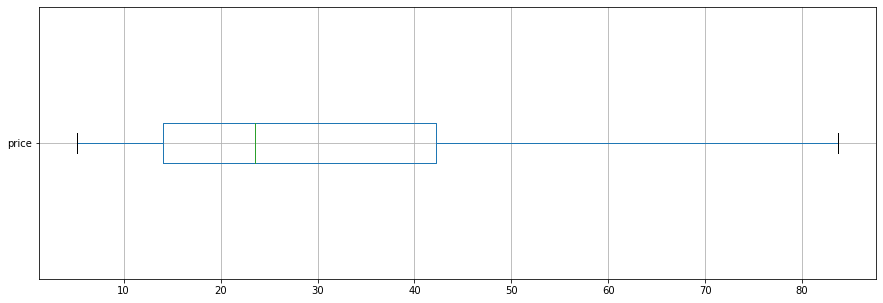

In [15]:
df_final.boxplot(column = "price", figsize=(15,5), showfliers=False, vert = False)

# Les valeurs hors-du-commun:

<AxesSubplot:>

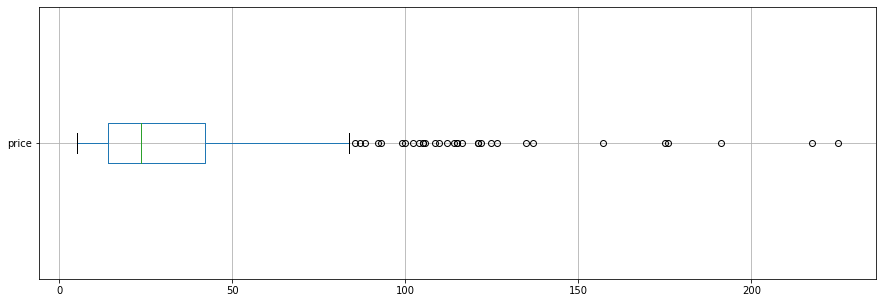

In [16]:
df_final.boxplot(column = "price", figsize=(15,5), vert = False)

In [17]:
Q1 = df_final['price'].quantile(0.25)
Q3 = df_final['price'].quantile(0.75)
IQR = Q3 - Q1    #IQR signifie Interquartile Range, en français: écart interquartile. 

In [18]:
df_outliers = df_final.query('price <= @Q1 - 1.5 * @IQR or  price >= @Q3 + 1.5 * @IQR')

In [19]:
print("Nous avons ", len(df_outliers), " outliers dans notre étude. Ce qui représente ", 
round((len(df_outliers) / len(df_final)*100),2), "% de notre échantillon." )

Nous avons  32  outliers dans notre étude. Ce qui représente  4.48 % de notre échantillon.


In [24]:
df_outliers.sort_values("price").head(32)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_name,CA_par_produit
206,4359,1,85.6,0,outofstock,13853,1.0,champagne-larmandier-bernier-grand-cru-vieille...,85.6
439,5026,1,86.8,2,instock,13913,0.0,champagne-agrapart-fils-mineral-extra-brut-bla...,0.0
66,4132,1,88.4,5,instock,11668,0.0,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,0.0
503,5565,1,92.0,0,outofstock,19822,0.0,tempier-bandol-cabassaou-2017,0.0
603,5916,1,93.0,3,instock,14774,0.0,wemyss-malts-single-cask-chocolate-moka-cake,0.0
656,6214,1,99.0,7,instock,11601,0.0,domaine-des-comtes-lafon-volnay-1er-cru-champa...,0.0
64,4115,1,100.0,11,instock,15382,0.0,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,0.0
381,4903,1,102.3,20,instock,14805,0.0,domaine-des-croix-corton-grand-cru-les-greves-...,0.0
223,4407,1,104.0,6,instock,3509,1.0,cognac-frapin-cigar-blend,104.0
433,5008,1,105.0,10,instock,11602,0.0,domaine-des-comtes-lafon-volnay-1er-cru-santen...,0.0
